In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from numpy.polynomial.polynomial import Polynomial
from scipy import signal



In [3]:
time, y1, y2 = np.loadtxt("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/2024-08-12/index-writing-13-26-55.txt", delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2

In [4]:
def detrend_polynomial(data, degree = 2):
    x = np.arange(len(data))
    poly = Polynomial.fit(x, data, degree)
    trend = poly(x)
    return data - trend


In [8]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w)/w, 'same')


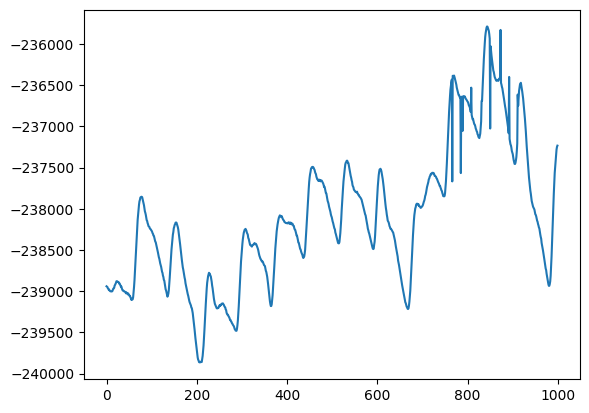

In [20]:
plt.plot(y2[1500:2500])

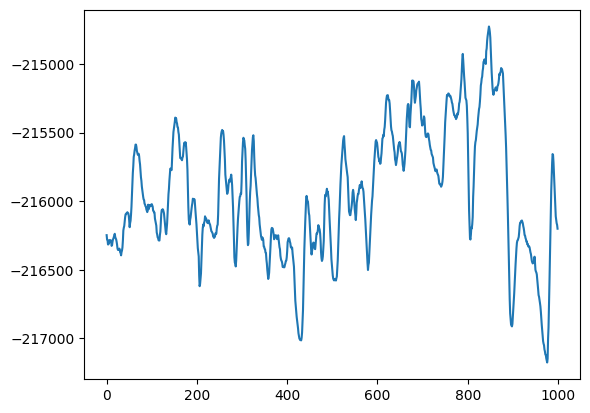

In [29]:
plt.plot(y1[1500:2500])

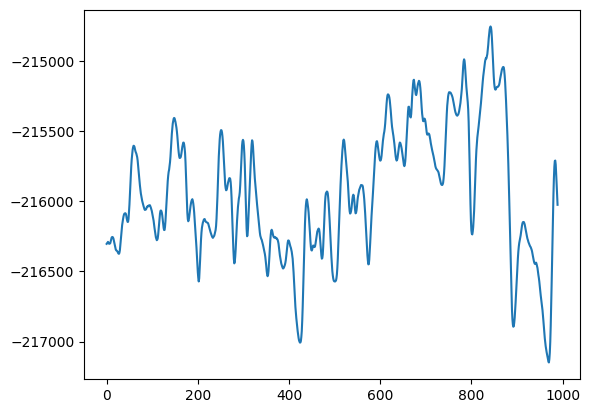

In [28]:
plt.plot(moving_average(y1[1500:2500],5 )[5:-5])

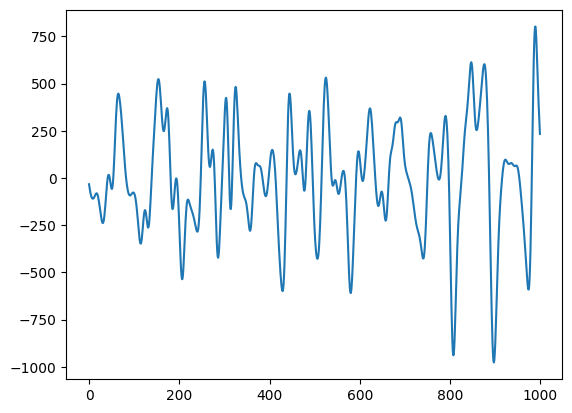

In [33]:
fpass = [0.5, 6.5]  # Passband frequency range
order = 3
sos = signal.butter(order, fpass, fs=100, btype='band', output='sos')



yFiltered1 = signal.sosfiltfilt(sos, y1[1500:2500])
plt.plot(yFiltered1)

In [135]:
y = detrend_polynomial(y1[300:800])
y2 = y2[300:800]

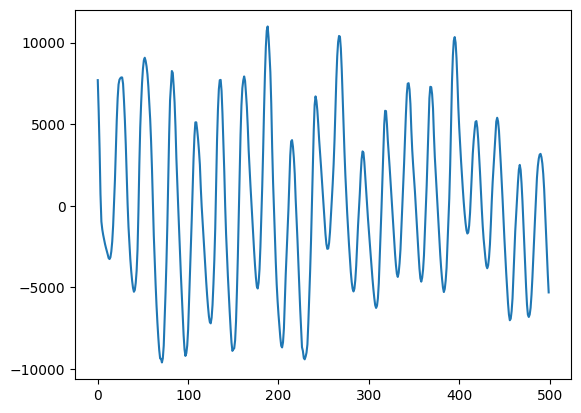

In [136]:
plt.plot(y)

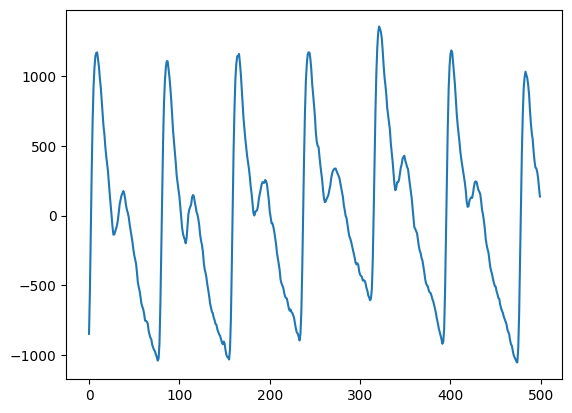

In [137]:
y2 = detrend_polynomial(y2)
plt.plot(y2)

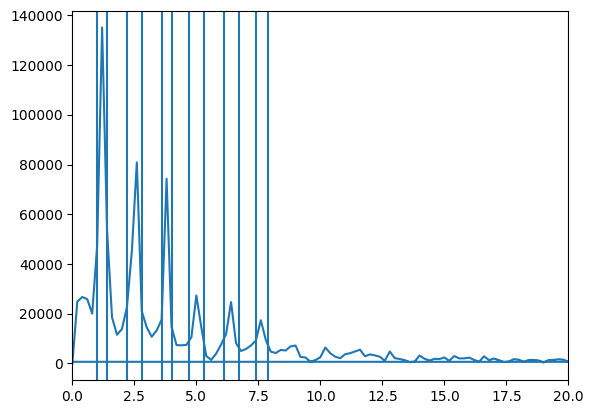

In [138]:
# list = []
# for i in range(100):
#     list.append(np.sin(i))
plt.xlim(0,20)
yf = fft(y2)
xf = fftfreq(len(y2), 1/100)
plt.plot(xf, np.abs(yf))
plt.axvline(x=1)
plt.axvline(x=1.4)

plt.axvline(x=2.2)
plt.axvline(x=2.8)

plt.axvline(x=3.6)
plt.axvline(x=4)

plt.axvline(x=4.7)
plt.axvline(x=5.3)

plt.axvline(x=6.1)
plt.axvline(x=6.7)

plt.axvline(x=7.4)
plt.axvline(x=7.9)


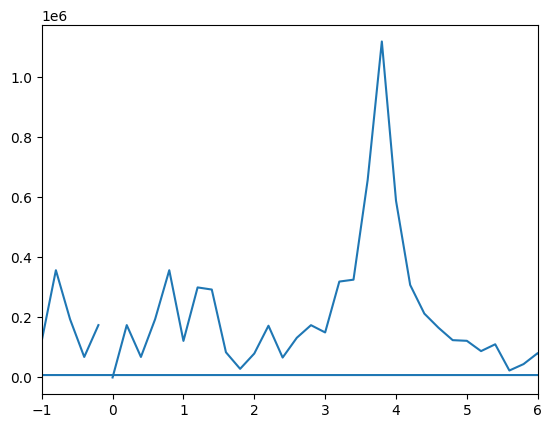

In [139]:
yf = fft(y)
xf = fftfreq(len(y), 1 / 100)

plt.xlim(-1, 6)
plt.plot(xf, np.abs(yf))
plt.show()

In [142]:

sos1 = signal.butter(2, [1, 1.4], fs=100, btype='band', output='sos')
sos2 = signal.butter(2, [2.2, 2.8], fs=100, btype='band', output='sos')
sos3 = signal.butter(2, [3.6, 4], fs=100, btype='band', output='sos')

sos4 = signal.butter(2, [4.7, 5.3], fs=100, btype='band', output='sos')
sos5 = signal.butter(2, [6.1, 6.7], fs=100, btype='band', output='sos')
sos6 = signal.butter(2, [7.4, 7.9], fs=100, btype='band', output='sos')
# plt.axvline(x=1)
# plt.axvline(x=1.4)

# plt.axvline(x=2.2)
# plt.axvline(x=2.8)

# plt.axvline(x=3.6)
# plt.axvline(x=4)

# plt.axvline(x=4.7)
# plt.axvline(x=5.3)

# plt.axvline(x=6.1)
# plt.axvline(x=6.7)

# plt.axvline(x=7.4)
# plt.axvline(x=7.9)




# sos1 = signal.butter(2, [1, 1.4], fs=100, btype='bandstop', output='sos')
# sos2 = signal.butter(2, [2.2, 2.8], fs=100, btype='bandstop', output='sos')
# sos3 = signal.butter(2, [3.6, 4], fs=100, btype='bandstop', output='sos')
# y2 = (signal.sosfiltfilt(sos, y2))

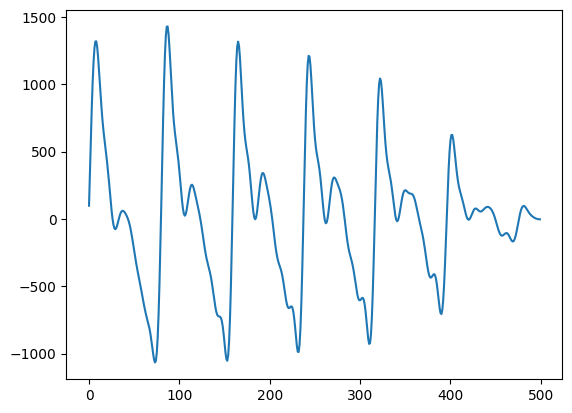

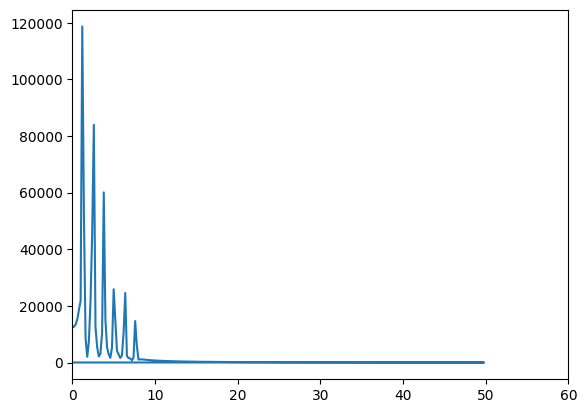

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


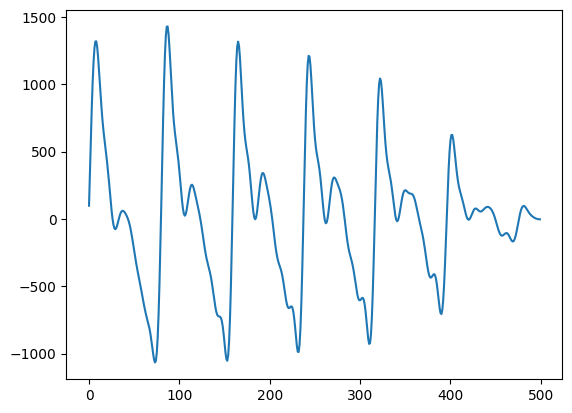

In [188]:
yFirst = (signal.sosfiltfilt(sos1, y2))
ySecond =(signal.sosfiltfilt(sos2, y2))
yThird = (signal.sosfiltfilt(sos3, y2))
yFourth = (signal.sosfiltfilt(sos4, y2))
yFifth =(signal.sosfiltfilt(sos5, y2))
ySixth = (signal.sosfiltfilt(sos6, y2))
combined_filtered_signal = np.sum([yFirst, ySecond, yThird, yFourth, yFifth, ySixth], axis=0)
plt.plot(combined_filtered_signal)
plt.show()
yf = fft(combined_filtered_signal)
xf = fftfreq(len(combined_filtered_signal), 1 / 100)

plt.xlim(0, 60)
plt.plot(xf, np.abs(yf))
plt.show()

plt.plot(scipy.fft.ifft(yf))
plt.show()

In [168]:
yf = np.abs(yf)
yf = yf[:40]

In [163]:
def linear_interpolation(sequence, new_length):
    interpolated_sequence = []
    old_length = len(sequence)
    for i in range(new_length):
        index = i * (old_length - 1) / (new_length - 1)
        low_index = int(index)
        high_index = min(low_index + 1, old_length - 1)
        low_value = sequence[low_index]
        high_value = sequence[high_index]
        fraction = index - low_index
        interpolated_value = low_value + fraction * (high_value - low_value)
        interpolated_sequence.append(interpolated_value)
    return interpolated_sequence

In [171]:
import scipy

[ 6 13 19 25 32 38]


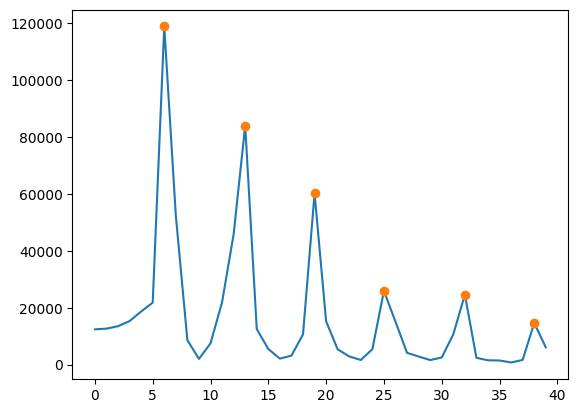

[118714.20973755  83951.21695722  60088.82924921  25889.37308644
  24573.88009815  14629.18005384]


In [179]:
peaks, _ = scipy.signal.find_peaks(yf)
print(peaks)

plt.plot(yf)
print(yf[peaks])

plt.plot(peaks, yf[peaks], "o")
plt.show()


In [181]:
res = dict(map(lambda i,j : (i,j) , peaks,yf[peaks]))



{6: 118714.20973754821,
 13: 83951.21695721838,
 19: 60088.829249207025,
 25: 25889.373086435935,
 32: 24573.88009815372,
 38: 14629.180053835744}

In [182]:
list = []
for i in range(40):
    if i in res:
        list.append(res[i])
    else:
        list.append(0)

print(list)

[0, 0, 0, 0, 0, 0, 118714.20973754821, 0, 0, 0, 0, 0, 0, 83951.21695721838, 0, 0, 0, 0, 0, 60088.829249207025, 0, 0, 0, 0, 0, 25889.373086435935, 0, 0, 0, 0, 0, 0, 24573.88009815372, 0, 0, 0, 0, 0, 14629.180053835744, 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


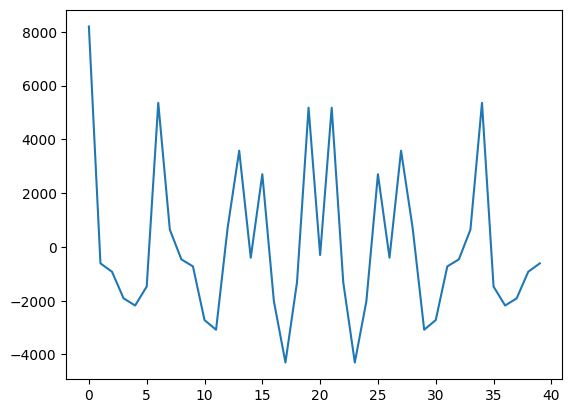

In [186]:
plt.plot(scipy.fft.ifft(list))

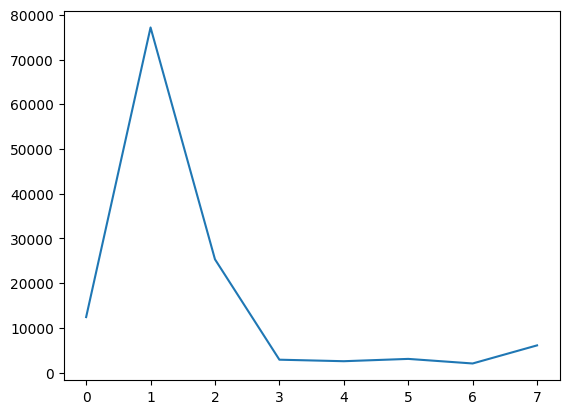

In [167]:
plt.plot(linear_interpolation(yf, 8))

In [158]:
t_interp = np.linspace(0, 50, 5/100, endpoint=False)
t = np.linspace(0, 50, 1/100, endpoint=False)

# Perform linear interpolation
sig_interp = np.interp(t_interp, t, yf)


TypeError: 'float' object cannot be interpreted as an integer

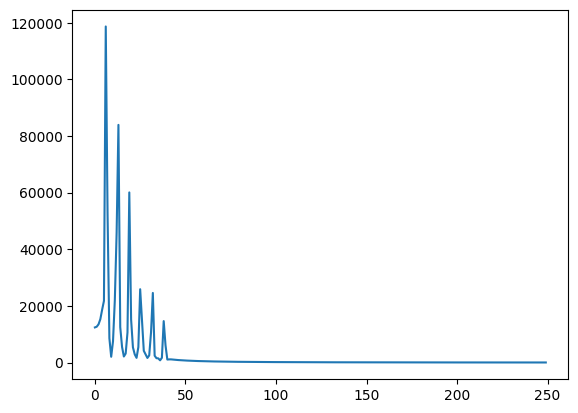

In [154]:
plt.plot(yf[:250])

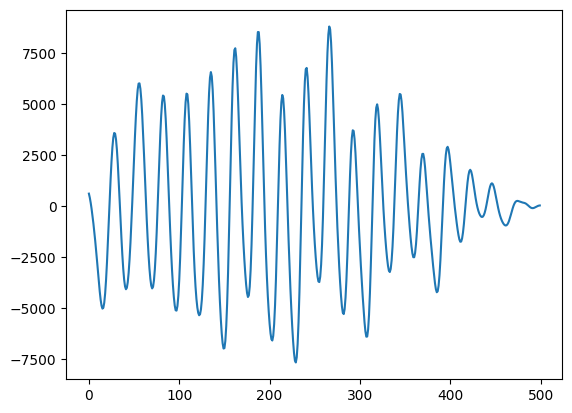

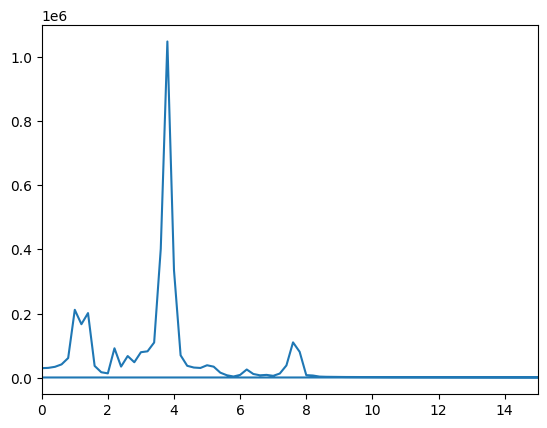

In [131]:
yFirst = (signal.sosfiltfilt(sos1, y))
ySecond =(signal.sosfiltfilt(sos2, y))
yThird = (signal.sosfiltfilt(sos3, y))
yFourth = (signal.sosfiltfilt(sos4, y))
yFifth =(signal.sosfiltfilt(sos5, y))
ySixth = (signal.sosfiltfilt(sos6, y))
combined_filtered_signal = np.sum([yFirst, ySecond, yThird, yFourth, yFifth, ySixth], axis=0)
plt.plot(combined_filtered_signal)
plt.show()
yf = fft(combined_filtered_signal)
xf = fftfreq(len(combined_filtered_signal), 1 / 100)

plt.xlim(0, 15)
plt.plot(xf, np.abs(yf))
plt.show()

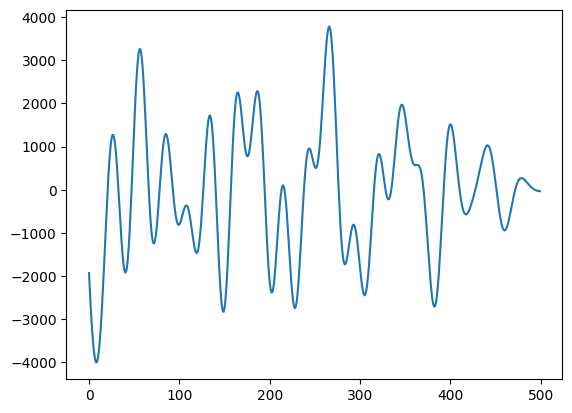

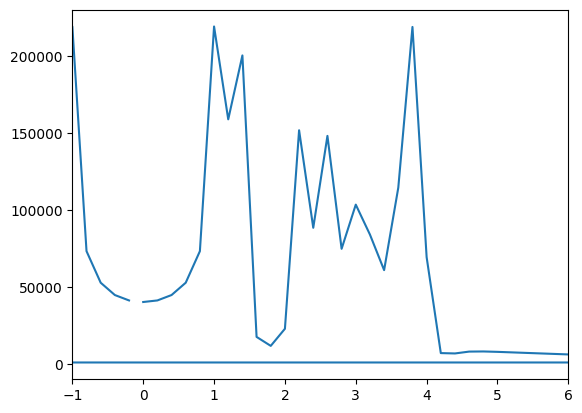

In [100]:
# combined_filtered_signal = np.sum([yFirst, ySecond, yThird], axis=0)


In [34]:
import keras

In [36]:
model = keras.models.load_model("/Users/henrywang/Documents/PPGDataAnalysis3:6:24/MergedModel-MAP-6-5-24.keras")

2024-08-12 13:41:10.253179: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-12 13:41:10.253301: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-12 13:41:10.253307: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-12 13:41:10.253875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-12 13:41:10.254394: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


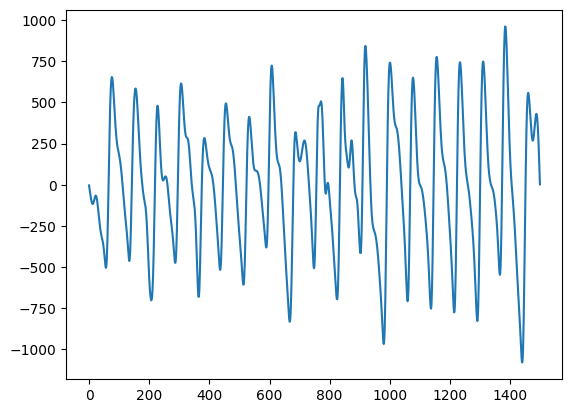

In [39]:
yFiltered1 = signal.sosfiltfilt(sos, y1[1500:3000])
yFiltered2 = signal.sosfiltfilt(sos, y2[1500:3000])

plt.plot(yFiltered2)

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 16)                   128       ['input_3[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 500)]                0         []                            
                                                                                              

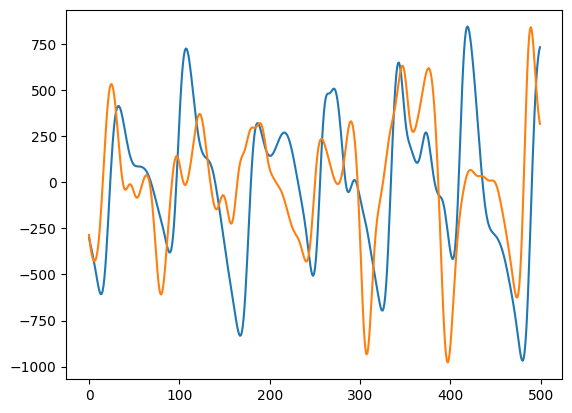

In [44]:
plt.plot(yFiltered2[500:1000])
plt.plot(yFiltered1[500:1000])

writingFinger = (yFiltered2[500:1000])
writingToe = (yFiltered1[500:1000])

In [75]:
new1 = []
new1.append(yFiltered2[500:1000])

In [99]:
yFiltered1[500:1000]


array([-2.86302780e+02, -3.29646453e+02, -3.64885648e+02, -3.92213458e+02,
       -4.11865620e+02, -4.23912294e+02, -4.28105825e+02, -4.23828496e+02,
       -4.10166510e+02, -3.86104753e+02, -3.50801175e+02, -3.03874088e+02,
       -2.45630192e+02, -1.77177851e+02, -1.00402482e+02, -1.78188671e+01,
        6.76524187e+01,  1.52925715e+02,  2.34964332e+02,  3.10948542e+02,
        3.78393671e+02,  4.35223677e+02,  4.79815076e+02,  5.11031423e+02,
        5.28262101e+02,  5.31462542e+02,  5.21175085e+02,  4.98499683e+02,
        4.64993539e+02,  4.22513995e+02,  3.73058241e+02,  3.18661830e+02,
        2.61386009e+02,  2.03373638e+02,  1.46912185e+02,  9.44248130e+01,
        4.83272363e+01,  1.07448167e+01, -1.68414381e+01, -3.39079687e+01,
       -4.10617757e+01, -4.00225919e+01, -3.34112967e+01, -2.43764503e+01,
       -1.61140567e+01, -1.13513745e+01, -1.18816504e+01, -1.82512050e+01,
       -2.96887661e+01, -4.43112934e+01, -5.95608339e+01, -7.27626856e+01,
       -8.16682256e+01, -

In [101]:
writingFinger = np.array([yFiltered1[500:1000]])
writingToe = np.array([yFiltered2[500:1000]])
writing_features =  np.array([[17, 179, 172.2, 90,77,2,779]])

In [116]:
np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/asd/writingFinger", writingFinger)
np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/asd/writingToe", writingToe)
np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/asd/writingFeatures", writing_features)


In [106]:
import tensorflow as tf

In [109]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold
        self.firstTime = True

    def on_epoch_end(self, epoch, logs=None): 
        loss = logs["loss"]
        if loss < self.threshold:
            self.model.stop_training = True
my_callback = MyThresholdCallback(threshold=5)

  

In [ ]:
def min_max_scaling(d):
    min_val = min(d)
    max_val = max(d)
    scaled_data = [(x - min_val) / (max_val - min_val) for x in d]
    return scaled_data

In [123]:
mergedModel = keras.models.load_model("/Users/henrywang/Documents/PPGDataAnalysis3:6:24/MergedModelDBP-8-12-24.keras")
mergedModel.predict(x=[writingFinger, writingToe, writing_features])

1/1 [==============================] - 0s 51ms/step


array([[81.20551]], dtype=float32)

In [114]:
history.history['loss'][200:]

[485.43743896484375,
 292.0432434082031,
 1211.6092529296875,
 1235.243896484375,
 72.4005126953125,
 79.588134765625,
 1111.852294921875,
 856.0230712890625,
 701.65185546875,
 776.0497436523438,
 483.80682373046875,
 290.9293518066406,
 1208.7401123046875,
 1232.3125,
 71.941162109375,
 79.65795135498047,
 1108.751220703125,
 853.56787109375,
 700.2242431640625,
 774.4393920898438,
 482.34014892578125,
 289.9280090332031,
 1206.1490478515625,
 1229.6669921875,
 71.5198974609375,
 79.72655487060547,
 1105.9439697265625,
 851.342529296875,
 698.935791015625,
 772.984375,
 481.00518798828125,
 289.0168762207031,
 1203.798828125,
 1227.266357421875,
 71.1392822265625,
 79.78636932373047,
 1103.394775390625,
 849.322509765625,
 697.7579345703125,
 771.65576171875,
 479.79473876953125,
 288.1921691894531,
 1201.6551513671875,
 1225.076416015625,
 70.7923583984375,
 79.84130096435547,
 1101.0684814453125,
 847.48046875,
 696.683349609375,
 770.4427490234375,
 478.68902587890625,
 287.438385

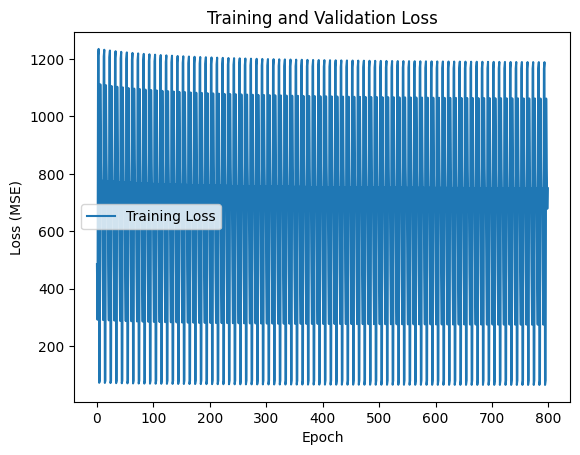

In [113]:
# plt.plot(history.history['loss'][200:], label='Training Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.legend()
# plt.show()